# ----------------------------- Naive Bayes -----------------------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Utility function to drop rows
def dropRows(row_nums,df):
    df.drop(axis=0,index=row_nums,inplace=True)

In [5]:
dia = pd.read_csv('diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking for Corelation between features : 

<AxesSubplot:>

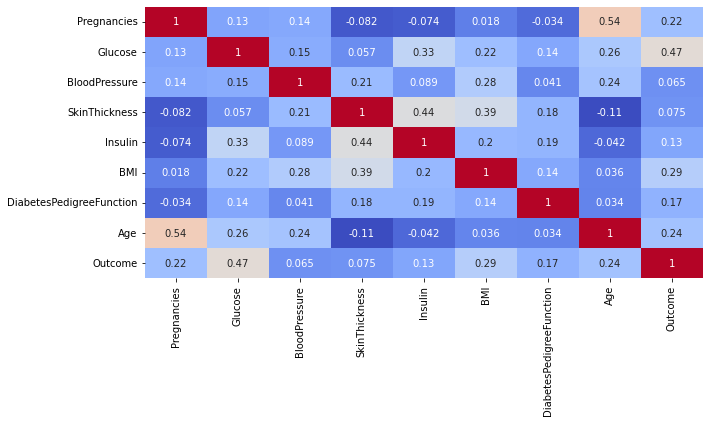

In [7]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(dia.corr(),cbar=False,annot=True,cmap="coolwarm")

#### INFERENCE : 
There seems to be no extreem positive or negative corelation between feature, hence not dropping any feature

## Checking for NULL Values : 

In [8]:
dia.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### INFERENCE :
No missing data to deal with

In [9]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

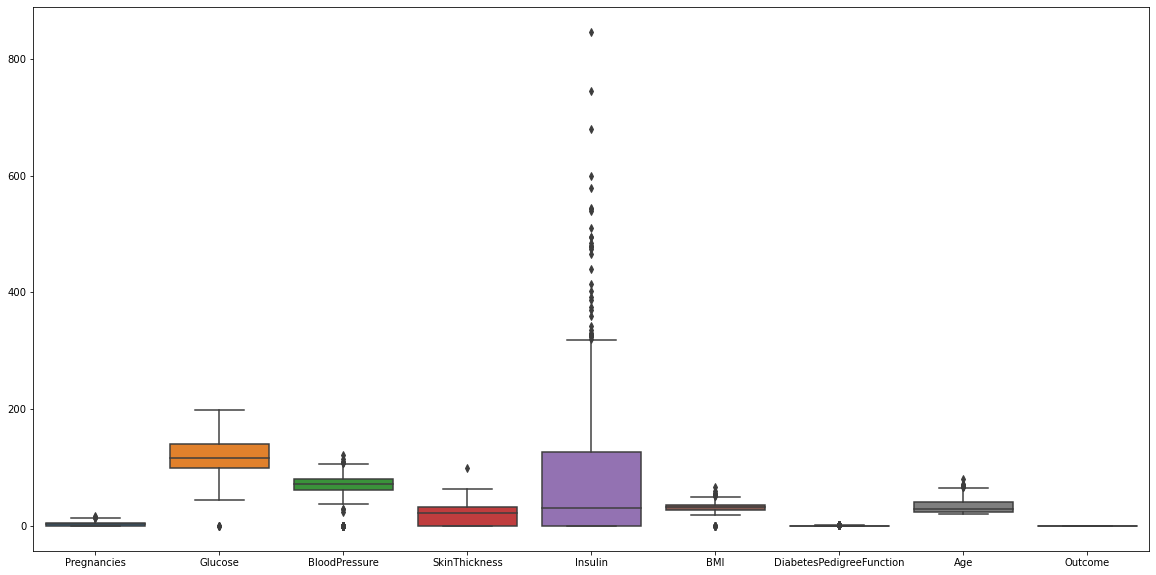

In [10]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=dia)

##### BMI cannot  be zero, heace dropping them as they are outliers

In [11]:
row_nums = dia[dia['BMI']==0].index
print(row_nums,"\nCount : ",len(row_nums))

Int64Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64') 
Count :  11


In [12]:
dropRows(row_nums,dia)

##### Glucose cannot  be zero, heace dropping them as they are outliers

In [13]:
row_nums = dia[dia['Glucose']==0].index
print(row_nums,"\nCount : ",len(row_nums))

Int64Index([75, 182, 342, 349, 502], dtype='int64') 
Count :  5


In [14]:
dropRows(row_nums,dia)

In [15]:
len(dia) # Total number of Rows in the Dataset

752

##### Other features like BloodPressure, SkinThickness, Insulin cannot be 0 but dropping them will result in loss of data, hence we shall replace them with the median

In [16]:
row_nums = dia[dia['BloodPressure']==0].index
print(row_nums,"\nCount : ",len(row_nums)) # approx 5% of data set size

Int64Index([  7,  15,  78, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347,
            357, 430, 435, 453, 468, 484, 533, 535, 589, 601, 604, 619, 643,
            697, 703],
           dtype='int64') 
Count :  28


In [17]:
row_nums = dia[dia['SkinThickness']==0].index
print(row_nums,"\nCount : ",len(row_nums)) # approx 30% of data set size

Int64Index([  2,   5,   7,  10,  11,  12,  15,  17,  21,  22,
            ...
            734, 739, 743, 749, 750, 757, 758, 759, 762, 766],
           dtype='int64', length=218) 
Count :  218


In [18]:
row_nums = dia[dia['Insulin']==0].index
print(row_nums,"\nCount : ",len(row_nums)) # approx 50% of data set size

Int64Index([  0,   1,   2,   5,   7,  10,  11,  12,  15,  17,
            ...
            754, 756, 757, 758, 759, 761, 762, 764, 766, 767],
           dtype='int64', length=360) 
Count :  360


##### Replace by Median Values : 

In [19]:
for col in ['Insulin','SkinThickness','BloodPressure']:
    dia[col]=dia[col].apply(lambda x : dia[col].median() if x==0 else x)

## Train and Test Data Preparation : 

In [20]:
dia.sort_values('Outcome',inplace=True)
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
385,1,119,54.0,13.0,50.0,22.3,0.205,24,0
466,0,74,52.0,10.0,36.0,27.8,0.269,22,0
467,0,97,64.0,36.0,100.0,36.8,0.600,25,0
469,6,154,78.0,41.0,140.0,46.1,0.571,27,0
470,1,144,82.0,40.0,39.0,41.3,0.607,28,0


In [21]:
dia.reset_index(drop=True,inplace=True)
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,119,54.0,13.0,50.0,22.3,0.205,24,0
1,0,74,52.0,10.0,36.0,27.8,0.269,22,0
2,0,97,64.0,36.0,100.0,36.8,0.600,25,0
3,6,154,78.0,41.0,140.0,46.1,0.571,27,0
4,1,144,82.0,40.0,39.0,41.3,0.607,28,0


In [22]:
dia.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
747,5,158,84.0,41.0,210.0,39.4,0.395,29,1
748,3,107,62.0,13.0,48.0,22.9,0.678,23,1
749,0,135,68.0,42.0,250.0,42.3,0.365,24,1
750,4,109,64.0,44.0,99.0,34.8,0.905,26,1
751,6,148,72.0,35.0,39.0,33.6,0.627,50,1


In [23]:
# Having Index variables so as to have a proper balance of classes in the train and test set

class_0_count = sum(dia['Outcome']==0)
class_1_count = sum(dia['Outcome']==1)
total_count = len(dia)
class_0_count,class_1_count,total_count

(488, 264, 752)

In [24]:
class_1_start_index = class_0_count
class_1_start_index

488

In [25]:
split_size = 0.6 # Size of Train and Test split

In [26]:
X = dia
Y = dia['Outcome']

In [27]:
X_Train = X[0:int(split_size*class_0_count)].append(X[class_1_start_index:class_1_start_index+int(split_size*class_1_count)])


C:\Users\nsimh\AppData\Local\Temp\ipykernel_21004\301092342.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_Train = X[0:int(split_size*class_0_count)].append(X[class_1_start_index:class_1_start_index+int(split_size*class_1_count)])


In [28]:
X_Test = X[int(split_size*class_0_count):class_1_start_index].append(X[class_1_start_index+int(split_size*class_1_count):])
Y_Test = Y[int(split_size*class_0_count):class_1_start_index].append(Y[class_1_start_index+int(split_size*class_1_count):])

C:\Users\nsimh\AppData\Local\Temp\ipykernel_21004\491274760.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_Test = X[int(split_size*class_0_count):class_1_start_index].append(X[class_1_start_index+int(split_size*class_1_count):])
C:\Users\nsimh\AppData\Local\Temp\ipykernel_21004\491274760.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_Test = Y[int(split_size*class_0_count):class_1_start_index].append(Y[class_1_start_index+int(split_size*class_1_count):])


In [29]:
X_Test.drop(axis=1,columns='Outcome',inplace=True)

In [30]:
X_Test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
292,1,124,74.0,36.0,39.0,27.8,0.100,30
293,1,124,60.0,32.0,39.0,35.8,0.514,21
294,1,92,62.0,25.0,41.0,19.5,0.482,25
295,0,152,82.0,39.0,272.0,41.5,0.270,27
296,1,111,62.0,13.0,182.0,24.0,0.138,23
...,...,...,...,...,...,...,...,...
747,5,158,84.0,41.0,210.0,39.4,0.395,29
748,3,107,62.0,13.0,48.0,22.9,0.678,23
749,0,135,68.0,42.0,250.0,42.3,0.365,24
750,4,109,64.0,44.0,99.0,34.8,0.905,26


In [31]:
X_Train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,119,54.0,13.0,50.0,22.3,0.205,24,0
1,0,74,52.0,10.0,36.0,27.8,0.269,22,0
2,0,97,64.0,36.0,100.0,36.8,0.600,25,0
3,6,154,78.0,41.0,140.0,46.1,0.571,27,0
4,1,144,82.0,40.0,39.0,41.3,0.607,28,0
...,...,...,...,...,...,...,...,...,...
641,6,194,78.0,23.0,39.0,23.5,0.129,59,1
642,3,182,74.0,23.0,39.0,30.5,0.345,29,1
643,10,161,68.0,23.0,132.0,25.5,0.326,47,1
644,7,109,80.0,31.0,39.0,35.9,1.127,43,1


### IMPLEMENTATION : 


In [32]:
#Class that handels the metric for the data

class metrics:
    tp=0
    tn=0
    fp=0
    fn=0
    
    def __init__(self,y,y_pred):
        for i in range(len(y)):
            if y[i] == 1 and y_pred[i] == 1:
                 self.tp += 1
            elif y[i] == 1 and y_pred[i] == 0:
                 self.fn += 1
            elif y[i] == 0 and y_pred[i] == 1:
                 self.fp += 1
            elif y[i] == 0 and y_pred[i] == 0:
                 self.tn += 1
                    
    def calc_acc(self):
        return (self.tp+self.tn)/(self.tp+self.tn+self.fp+self.fn)
    
    def calc_F1_score(self):
        precision = self.tp/(self.tp+self.fp)
        recall = self.tp/(self.tp+self.fn)
        f1_score = 2*precision*recall/(precision+recall)
        return f1_score


In [33]:
# Class to implement Navie Bayers classifier for Continous data for Classification
class NaiveBayers:
    class_0_mean = list()
    class_0_std = list()
    class_1_mean = list()
    class_1_std = list()
    prior_prob_class_0 = 0
    prior_prob_class_1 = 0

    #To calc Mean and Std of Class 0
    def calc_mean_and_std_class0(self,class_0_df):
        for col in class_0_df.columns:
            self.class_0_mean.append(class_0_df[col].mean())
            self.class_0_std.append(class_0_df[col].std())

    #To calc Mean and Std of Class 1
    def calc_mean_and_std_class1(self,class_1_df):
        for col in class_1_df.columns:
            self.class_1_mean.append(class_1_df[col].mean())
            self.class_1_std.append(class_1_df[col].std())
            
    #to fit the Gausian 
    def normal_dist(self,data,mean,std):
        dist = list()
        for i in range(len(data)):
            exp_pow = -0.5*(((data[i]-mean[i])/std[i])**2)
            exp = np.exp(exp_pow)
            deno = std[i]*np.sqrt(2*np.pi)
            fun = exp/deno
            dist.append(fun)
        return dist

    #To predict the class given data sample
    def predict_class(self,X_Test):
        Y_Pred = list()
        for data in X_Test:

            sum_class_0 = 0
            gauss_vals_0 = self.normal_dist(data,self.class_0_mean,self.class_0_std)

            for i in range(len(gauss_vals_0)):
                sum_class_0 = sum_class_0 + np.log(gauss_vals_0[i])

            sum_class_0 += np.log(self.prior_prob_class_0)

            sum_class_1 = 0
            gauss_vals_1 = self.normal_dist(data,self.class_1_mean,self.class_1_std)
            for i in range(len(gauss_vals_1)):
                sum_class_1 = sum_class_1 + np.log(gauss_vals_1[i])
            sum_class_1 += np.log(self.prior_prob_class_1)

            if(sum_class_0 > sum_class_1):
                Y_Pred.append(0)
            else:
                Y_Pred.append(1)
            
        return Y_Pred

    #To Fit the Training data to the curve
    def fit(self,X):
        class_0_df = X[X['Outcome']==0]
        class_1_df = X[X['Outcome']==1]
        class_0_df.drop(columns='Outcome',inplace=True)
        class_1_df.drop(columns='Outcome',inplace=True)
        self.prior_prob_class_0 = len(class_0_df)/len(X)
        self.prior_prob_class_1 = len(class_1_df)/len(X)

        self.calc_mean_and_std_class0(class_0_df)
        self.calc_mean_and_std_class1(class_1_df)
        

In [34]:
nb = NaiveBayers()
nb.fit(X_Train)

C:\Users\nsimh\AppData\Local\Temp\ipykernel_21004\1902575867.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_0_df.drop(columns='Outcome',inplace=True)
C:\Users\nsimh\AppData\Local\Temp\ipykernel_21004\1902575867.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1_df.drop(columns='Outcome',inplace=True)


In [37]:
Y_Pred = nb.predict_class(X_Test.values)

In [38]:
metric = metrics(Y_Test.values,Y_Pred)
print("\n The Accuracy of the Model is : ", metric.calc_acc()*100,"%")
print("\n The F1 Score of the Model is : ",metric.calc_F1_score()*100,"%")


 The Accuracy of the Model is :  74.83443708609272 %

 The F1 Score of the Model is :  62.74509803921568 %


### INFERENCE :
The accuracy and the F1 score are decent but can be improved with better data preprocessing